In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data=pd.read_csv(r"C:\Users\swath\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
data.describe(include=['number'])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Drop customerID column as it is not useful for clustering
data = data.drop('customerID', axis=1)

In [10]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
# Encode categorical features
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column])

In [12]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [13]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ..., -1.16032292,
        -0.39860759, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.25962894,
        -0.94876238, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.36266036,
        -1.64188328,  1.66382851],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -1.1686319 ,
        -0.13968008, -0.60102348],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.32033821,
        -0.31653445,  1.66382851],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.35896134,
         1.13801338, -0.60102348]])

# Perform K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

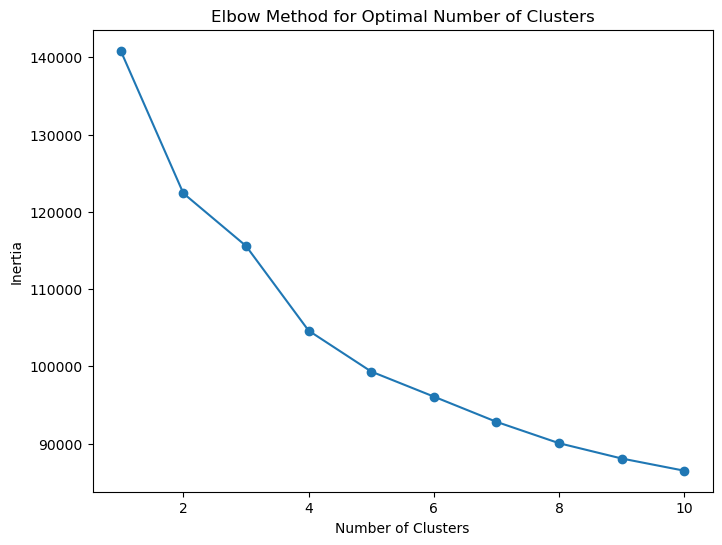

In [15]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [16]:
# Fit the KMeans model with the optimal number of clusters find out from the elbow method(=>optimal no. of cluster =4)
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [17]:
y_kmeans

array([0, 1, 1, ..., 0, 1, 2])

In [18]:
# Add the cluster labels to the original dataframe
data['Cluster'] = y_kmeans

In [19]:
# Display the first few rows with cluster labels
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,1


# Perform Hierarchical Clustering

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')


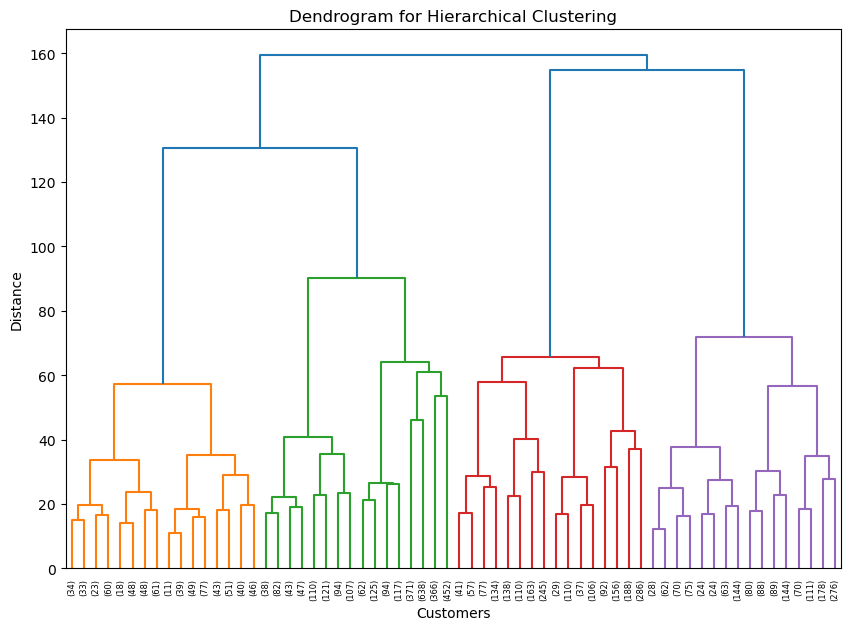

In [21]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
ahc=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(data_scaled)
y_ahc

array([3, 0, 0, ..., 3, 0, 2], dtype=int64)

In [24]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(data_scaled,y_ahc)

In [25]:
sil_ahc

0.12325060602659985

# Apply PCA for Dimensionality Reduction

In [26]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y_kmeans

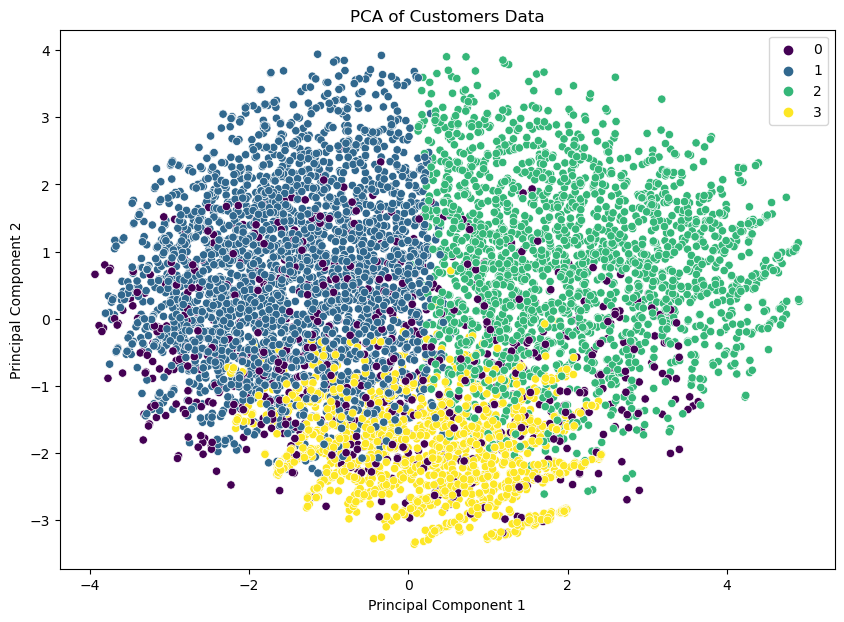

In [27]:
# Plot the PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of Customers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

           gender  SeniorCitizen   Partner  Dependents     tenure  \
Cluster                                                             
0        0.512012       0.150150  0.444444    0.295796  30.773273   
1        0.502740       0.223968  0.313117    0.164048  16.406650   
2        0.498043       0.184932  0.715264    0.377202  55.456947   
3        0.513784       0.031955  0.493108    0.434211  30.849624   

         PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Cluster                                                                 
0            0.000000       1.000000         0.000000        0.801802   
1            1.000000       0.833760         0.666788        0.373402   
2            0.992172       1.464775         0.616928        1.157534   
3            1.000000       0.427318         1.918546        1.028822   

         OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Cluster                                                             
0       

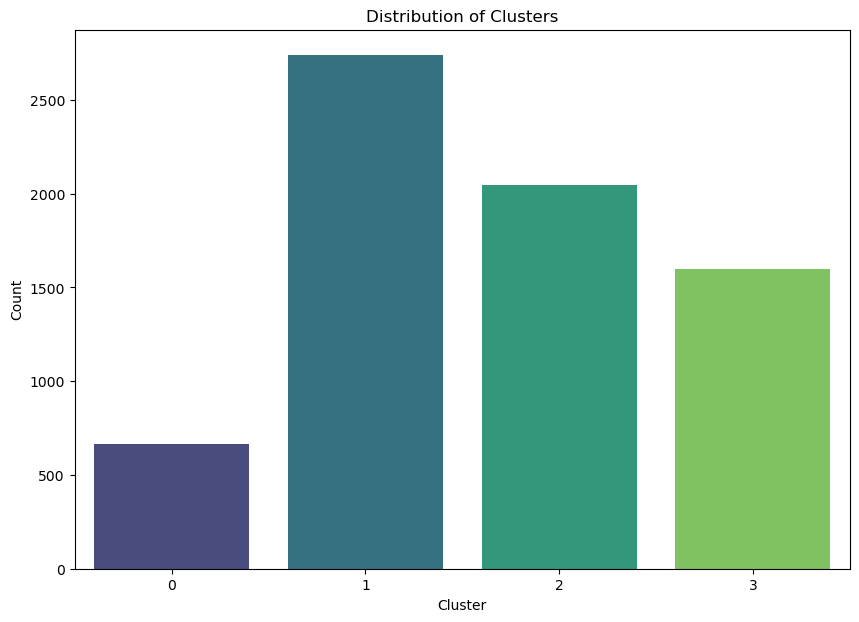

In [28]:
# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

# Visualize the distribution of clusters
plt.figure(figsize=(10, 7))
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


# From the PCA analysis grouped by clusters:

## Cluster Profiles: Each cluster exhibits distinct characteristics in terms of demographic and service-related features, indicating diverse customer segments.
## Churn Propensity: Clusters with higher churn rates (e.g., Cluster 1) may have specific service usage patterns or demographics contributing to churn, informing targeted retention strategies.

 # Perform DBSCAN Clustering

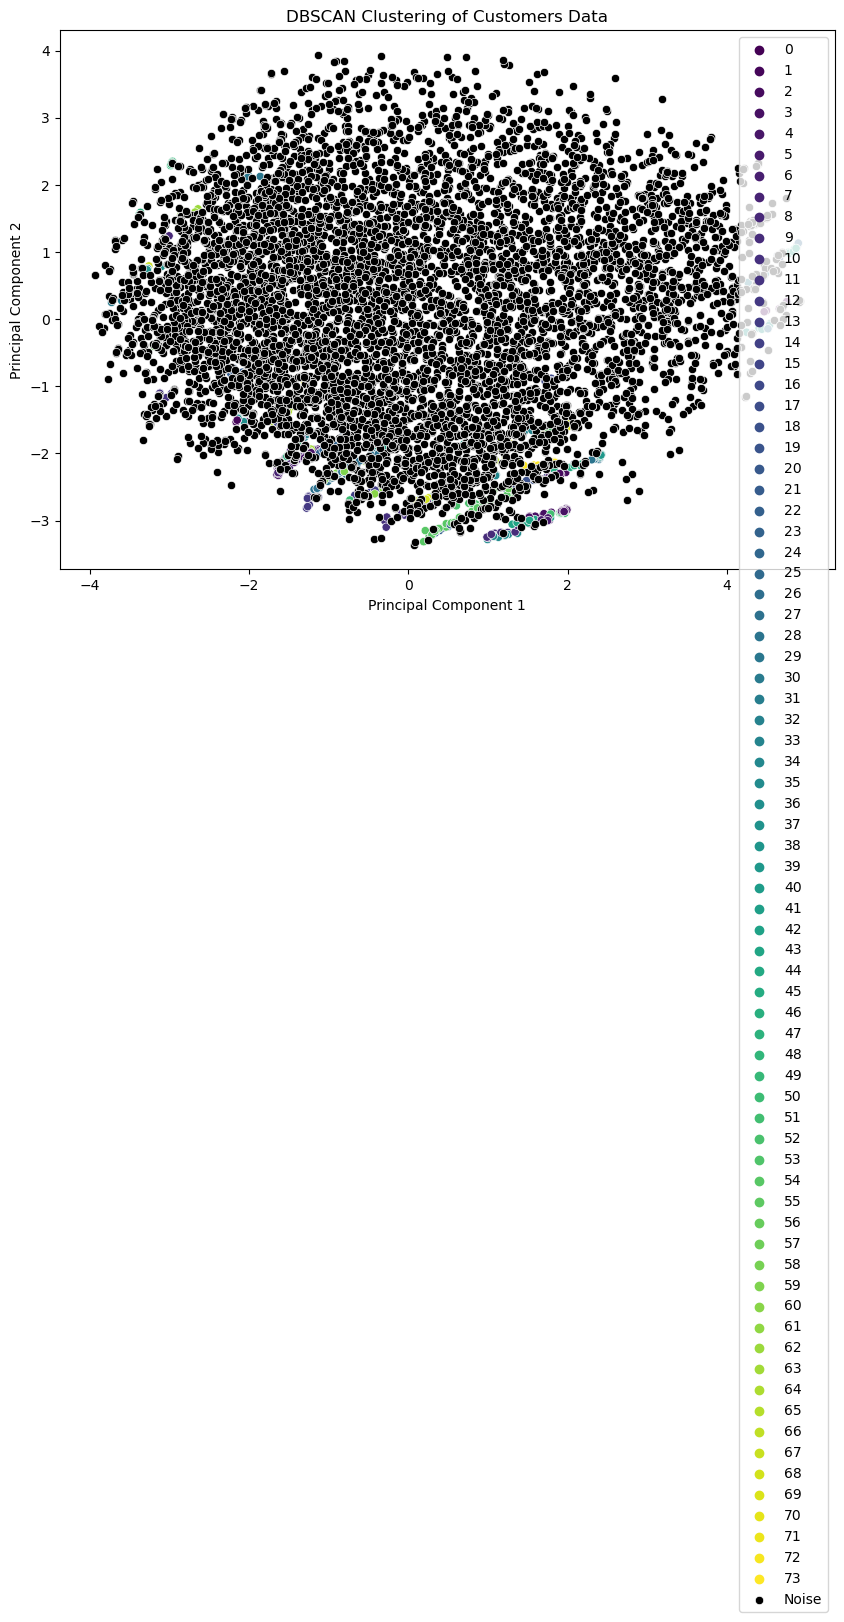

In [29]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Add the DBSCAN cluster labels to the pca_df dataframe
pca_df['DBSCAN_Cluster'] = dbscan_clusters

# Extract noise points (points labeled as -1)
noise_points = pca_df[pca_df['DBSCAN_Cluster'] == -1]

# Plot the DBSCAN results using PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df[pca_df['DBSCAN_Cluster'] != -1], hue='DBSCAN_Cluster', palette='viridis', legend='full')
sns.scatterplot(x='PC1', y='PC2', data=noise_points, color='black', label='Noise')
plt.title('DBSCAN Clustering of Customers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Noise: Denotes individual customers or data points that do not belong to any specific cluster according to the DBSCAN algorithm. These could be outliers or customers with unique characteristics.

# Perform Gaussian Mixture Model (GMM) Clustering

In [30]:
from sklearn.mixture import GaussianMixture

# Determine the optimal number of components for GMM using BIC
bic_scores = []
n_components_range = range(1, 11)
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))


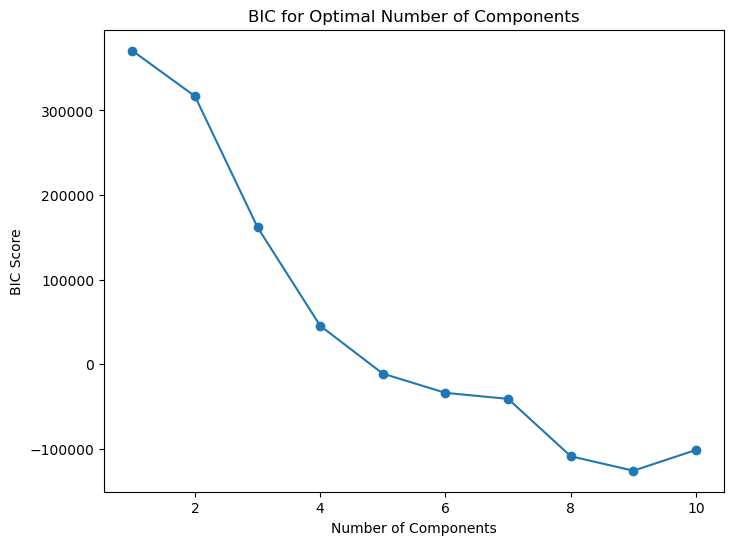

In [31]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC for Optimal Number of Components')
plt.show()


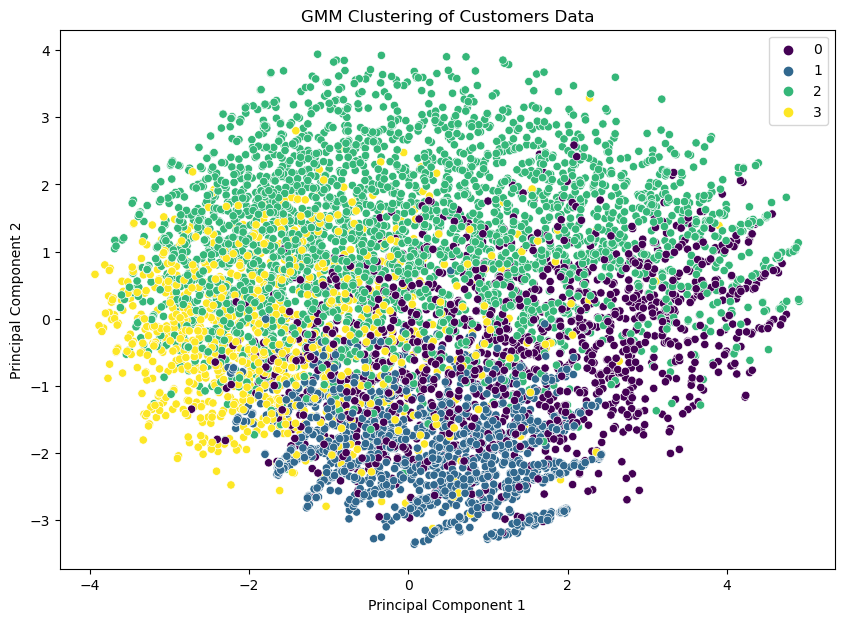

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Perform GMM clustering
gmm = GaussianMixture(n_components=4)  # Adjust n_components based on your data
gmm_clusters = gmm.fit_predict(data_scaled)

# Add the GMM cluster labels to the pca_df dataframe
pca_df['GMM_Cluster'] = gmm_clusters

# Plot the GMM results using PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='GMM_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('GMM Clustering of Customers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


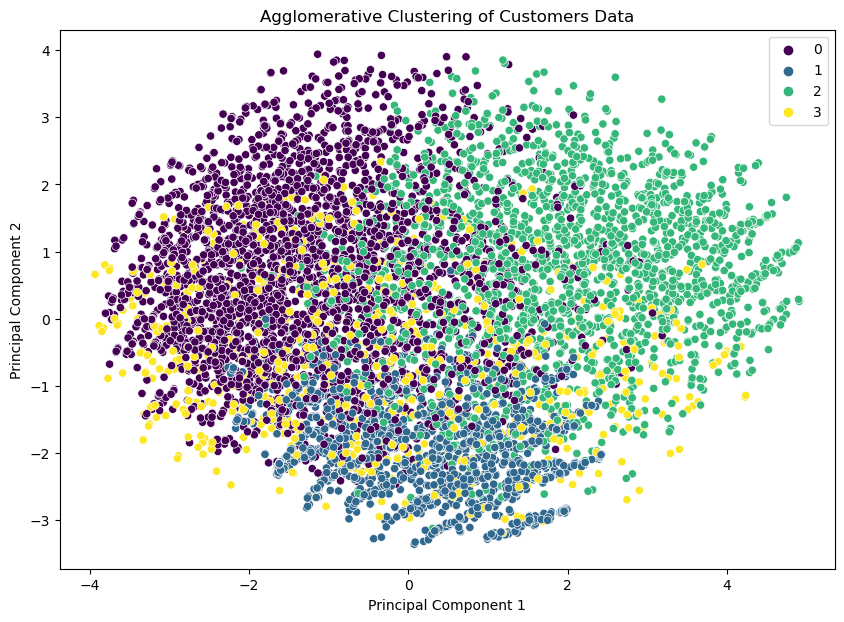

In [33]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_clustering.fit_predict(data_scaled)

# Add the Agglomerative cluster labels to the pca_df dataframe
pca_df['Agg_Cluster'] = agg_clusters

# Plot the Agglomerative Clustering results using PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Agglomerative Clustering of Customers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# plotting through kmean clustering

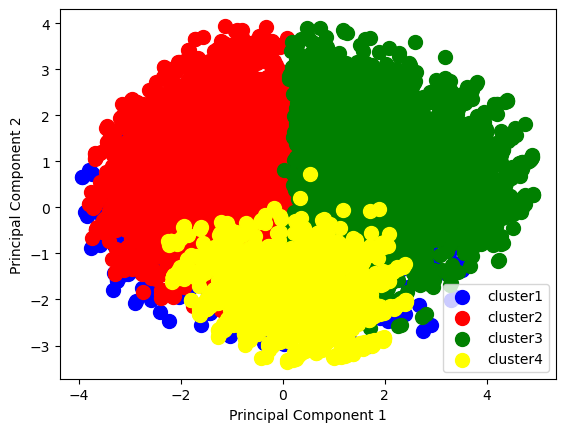

In [34]:
pca_df = pca_df.values
plt.scatter(pca_df[y_kmeans==0,0],pca_df[y_kmeans==0,1],s=100,c='blue',label='cluster1')
plt.scatter(pca_df[y_kmeans==1,0],pca_df[y_kmeans==1,1],s=100,c='red',label='cluster2')
plt.scatter(pca_df[y_kmeans==2,0],pca_df[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(pca_df[y_kmeans==3,0],pca_df[y_kmeans==3,1],s=100,c='yellow',label='cluster4')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Interpreting the Clusters

### Cluster Separation: The plot shows that the data points are divided into four clusters. The separation between these clusters indicates that the clustering algorithm has identified distinct groups within the customer data.

### Overlap: There is some overlap between clusters, especially around the center of the plot. This suggests that while there are distinct groupings, there are also similarities between some customers across different clusters.